<a href="https://colab.research.google.com/github/RichardCanchon29/BIT_IA_Bootcamp/blob/main/S1_Clase_5_EDA_MARKETING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA** EXPLORATORY DATA ANALYSIS (ANALISIS EXPLORATORIO DE DATOS)
*   AcceptedCmp1: 1 if customer accepted the offer in the 1st
campaign, 0 otherwise.
*   AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise.
*   AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise.
*   AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise.
*  AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise.
*   Response (target): 1 if customer accepted the offer in the last campaign, 0 otherwise.
*  Complain: 1 if customer complained in the last 2 years.
DtCustomer: Date of customer’s enrollment with the company.
Education: Customer’s level of education.
Marital: Customer’s marital status.
Kidhome: Number of small children in customer’s household.
Teenhome: Number of teenagers in customer’s household.
Income: Customer’s yearly household income.
MntFishProducts: Amount spent on fish products in the last 2 years.
MntMeatProducts: Amount spent on meat products in the last 2 years.
MntFruits: Amount spent on fruit products in the last 2 years.
MntSweetProducts: Amount spent on sweet products in the last 2 years.
MntWines: Amount spent on wine products in the last 2 years.
MntGoldProds: Amount spent on gold products in the last 2 years.
NumDealsPurchases: Number of purchases made with a discount.
NumCatalogPurchases: Number of purchases made using a catalog.
NumStorePurchases: Number of purchases made directly in stores.
NumWebPurchases: Number of purchases made through the company’s website.
NumWebVisitsMonth: Number of visits to the company’s website in the last month.
Recency: Number of days since the last purchase.

In [655]:
import pandas as pd #Para el manejo de los datos
import numpy as np #Para manejo de operaciones entre datos y columnas
import matplotlib.pyplot as plt #Para graficos
import seaborn as sns #Para graficos

In [656]:
from google.colab import drive #Concetar Con google Drive
drive.mount('/content/drive')
import os  # Libreria Necesaria para la ruta de la carpeta
os.chdir('/content/drive/MyDrive/Bootcamp_en_Inteligencias_Artificial/Colab Notebooks/Memorias_Bootcamp_AI ')

os.listdir()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['marketing_campaign.xlsx',
 'marketing_campaign (1).csv',
 'marketing_campaign (1).gsheet']

In [657]:
df = pd.read_excel('marketing_campaign.xlsx')

In [658]:
## SEP ; se separa  por ;
df2 = pd.read_csv('marketing_campaign (1).csv',sep =';')

In [659]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [660]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [661]:
#Describeme entrega un resumen solo de los atributos numericos
# count = numero de registros
# mean = promedio
# Std = desviasion

df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [662]:
# que tamaño tiene el data set
df.shape

(2240, 29)

In [663]:
# que tipo de etiquetas de educacion?
print(df['Education'].unique())

##Observacion: hay 5 categorias en educaciones

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [664]:
# que tipo relacion sentimental tiene
print(df['Marital_Status'].unique())
## Obv: Tiene 8 categorias de status sentimental
## YOLO: You Only Live Once

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [665]:
# que edad tienen los clientes ??
# obv:Tengo el atributo año de naciemiento (Year_Birth)
# año_actual o current_year

from datetime import date
current_year = date.today().year
print(current_year)

# df['Age'] = current_year - df['Year_Birth']
df['Age'] = 2014 - df['Year_Birth']

2024


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
<ipython-input-666-deffb345e197>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<Axes: xlabel='Age', ylabel='Density'>

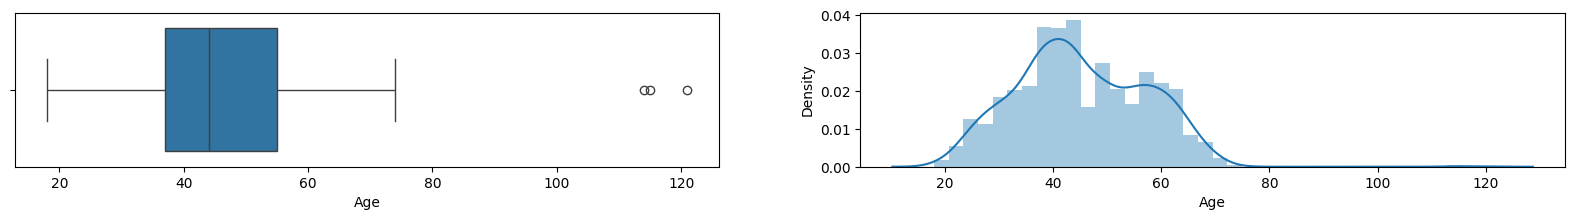

In [666]:
plt.figure(figsize=(20,2))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])

plt.subplot(1, 2, 2)
sns.distplot(df.Age)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
<ipython-input-667-cbb2766d7ccf>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<Axes: xlabel='Age', ylabel='Density'>

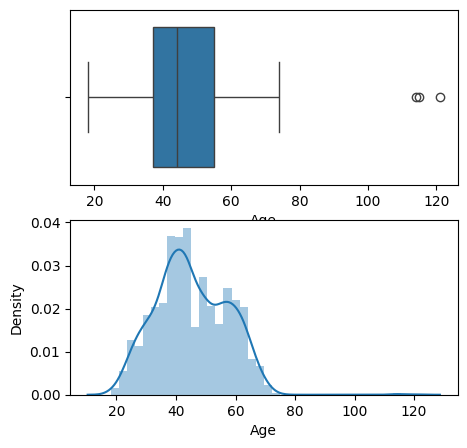

In [667]:
plt.figure(figsize=(5,5))
plt.subplot(2, 1, 1)
sns.boxplot(x=df['Age'])

plt.subplot(2, 1, 2)
sns.distplot(df.Age)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Age'>

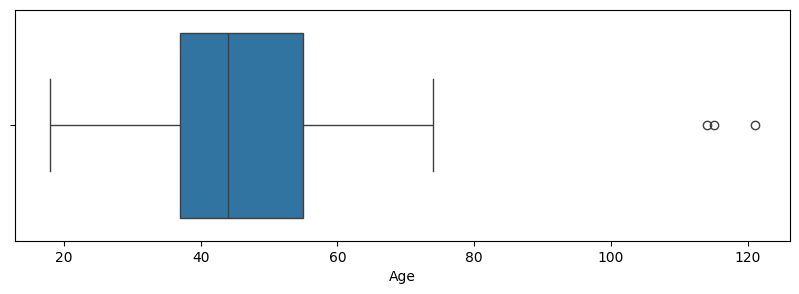

In [668]:
plt.figure(figsize=(10,3))
sns.boxplot(x=df['Age'])

In [669]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

## ~ en la logica booleana represetna negacion
## | representa el OR (Uno o el otro, se tiene que cumplir...

df = df[~((df['Age'] < (Q1-1.5*IQR)) | (df['Age'] > (Q3+1.5*IQR)))]

18.0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
<ipython-input-670-cbb2766d7ccf>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<Axes: xlabel='Age', ylabel='Density'>

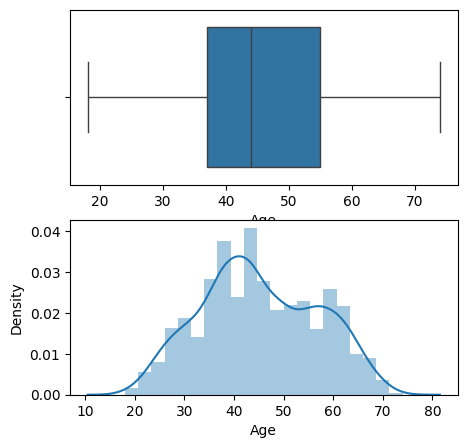

In [670]:
plt.figure(figsize=(5,5))
plt.subplot(2, 1, 1)
sns.boxplot(x=df['Age'])

plt.subplot(2, 1, 2)
sns.distplot(df.Age)

In [671]:
print(f'el 50% de los clientes tienen edades entrer {Q1} y {Q3}')

el 50% de los clientes tienen edades entrer 37.0 y 55.0


In [672]:
df.shape

(2237, 30)

In [673]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

## ~ en la logica booleana represetna negacion
## | representa el OR (Uno o el otro, se tiene que cumplir...

df = df[~((df['Income'] < (Q1-1.5*IQR)) | (df['Income'] > (Q3+1.5*IQR)))]

33241.0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
<ipython-input-674-49227a81dfda>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Income)


<Axes: xlabel='Income', ylabel='Density'>

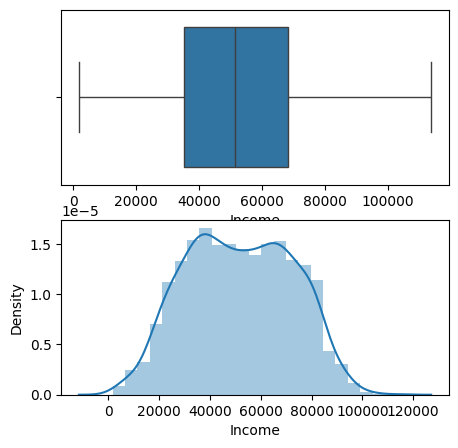

In [674]:
plt.figure(figsize=(5,5))
plt.subplot(2, 1, 1)
sns.boxplot(x=df['Income'])

plt.subplot(2, 1, 2)
sns.distplot(df.Income)

In [675]:
Q1 = df['MntSweetProducts'].quantile(0.25)
Q3 = df['MntSweetProducts'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

## ~ en la logica booleana represetna negacion
## | representa el OR (Uno o el otro, se tiene que cumplir...

df = df[~((df['MntSweetProducts'] < (Q1-1.5*IQR)) | (df['MntSweetProducts'] > (Q3+1.5*IQR)))]

33.0


In [676]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1989 entries, 1 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1989 non-null   int64  
 1   Year_Birth           1989 non-null   int64  
 2   Education            1989 non-null   object 
 3   Marital_Status       1989 non-null   object 
 4   Income               1967 non-null   float64
 5   Kidhome              1989 non-null   int64  
 6   Teenhome             1989 non-null   int64  
 7   Dt_Customer          1989 non-null   object 
 8   Recency              1989 non-null   int64  
 9   MntWines             1989 non-null   int64  
 10  MntFruits            1989 non-null   int64  
 11  MntMeatProducts      1989 non-null   int64  
 12  MntFishProducts      1989 non-null   int64  
 13  MntSweetProducts     1989 non-null   int64  
 14  MntGoldProds         1989 non-null   int64  
 15  NumDealsPurchases    1989 non-null   int64 

<Axes: >

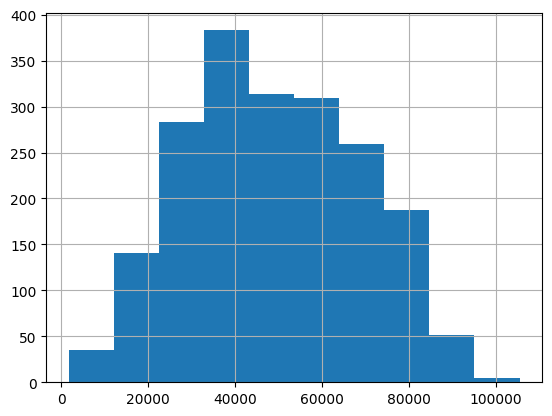

In [677]:
df['Income'].hist()

<Axes: title={'center': 'Income'}, xlabel='Education'>

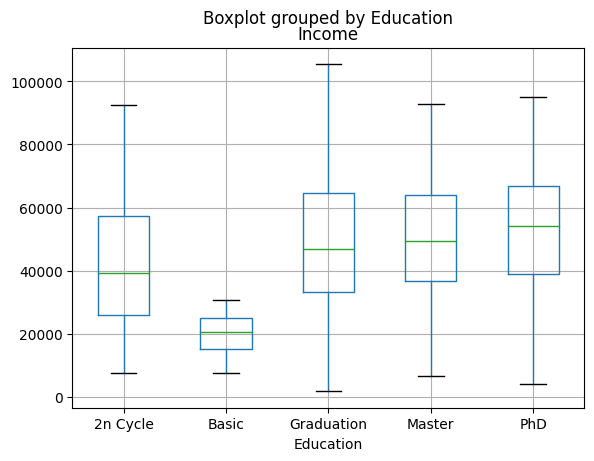

In [678]:
df.boxplot(column="Income", by="Education")

<Axes: title={'center': 'Income'}, xlabel='Teenhome'>

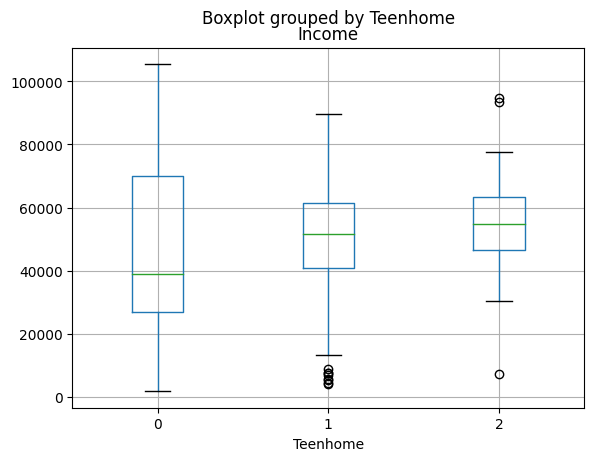

In [679]:
df.boxplot(column="Income", by="Teenhome")

<Axes: title={'center': 'Income'}, xlabel='Marital_Status'>

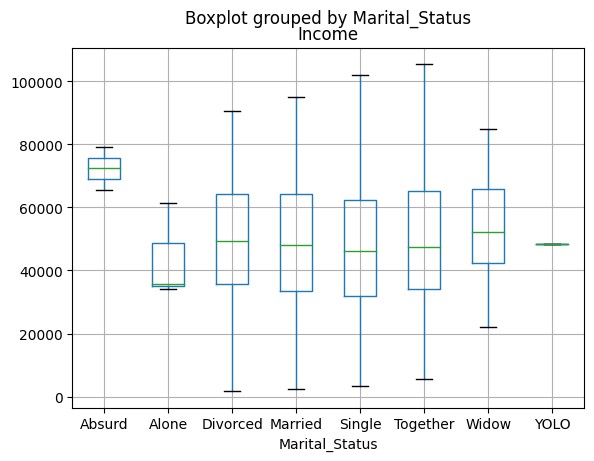

In [680]:
df.boxplot(column="Income", by="Marital_Status")

## Analisis:
- el Estado Sentimental de menor ingresos son los YOLO
- En promedio Divorsiados, casados, solteros, y divorciados tienen ingrsos promedios a 150 mil UDS al año

<Axes: title={'center': 'Income'}, xlabel='Kidhome'>

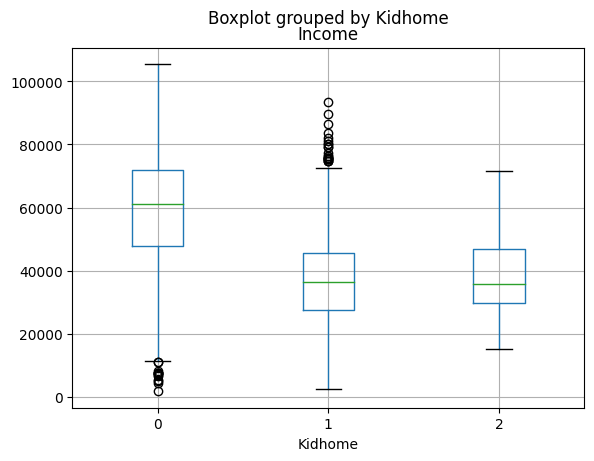

In [681]:
df.boxplot(column="Income", by="Kidhome")

In [682]:
media_salario = df['Income'].mean()
print(f"Media de salario: {media_salario}")

Media de salario: 48860.881545500764


In [683]:
resumen = df.describe()
print(resumen)

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   1989.000000  1989.000000    1967.000000  1989.000000  1989.000000   
mean    5584.445953  1968.886878   48860.881546     0.489191     0.529412   
std     3250.102911    11.654300   19804.943689     0.546167     0.546403   
min        1.000000  1940.000000    1730.000000     0.000000     0.000000   
25%     2829.000000  1959.000000   33587.500000     0.000000     0.000000   
50%     5491.000000  1970.000000   47743.000000     0.000000     1.000000   
75%     8418.000000  1977.000000   64340.000000     1.000000     1.000000   
max    11191.000000  1996.000000  105471.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  1989.000000  1989.000000  1989.000000      1989.000000   
mean     48.801408   275.811463    20.281549       135.762192   
std      28.960864   329.774814    33.163960       198.542223   
min       0.000000     0.000000     0.000000  

<Axes: title={'center': 'Income'}, xlabel='Age'>

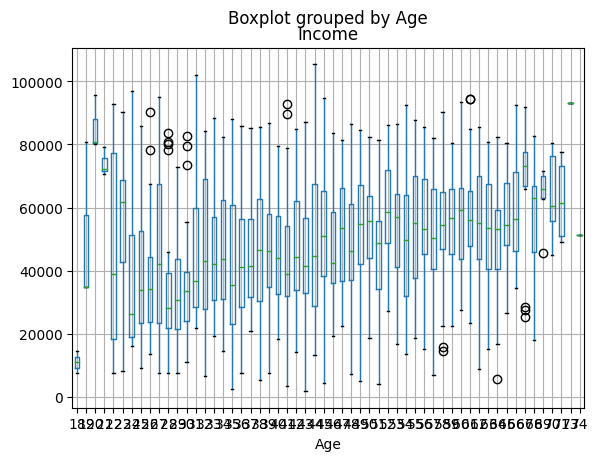

In [684]:
df.boxplot(column="Income", by="Age")

In [685]:
df['Age_Group'] = df['Age'].apply(lambda x: 'Children' if x <= 16
                                  else('Youth' if 17 <= x <= 30
                                  else ('Middle Aged' if 30 < x <=  45
                                  else 'Old'    )
))

In [686]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1989 entries, 1 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1989 non-null   int64  
 1   Year_Birth           1989 non-null   int64  
 2   Education            1989 non-null   object 
 3   Marital_Status       1989 non-null   object 
 4   Income               1967 non-null   float64
 5   Kidhome              1989 non-null   int64  
 6   Teenhome             1989 non-null   int64  
 7   Dt_Customer          1989 non-null   object 
 8   Recency              1989 non-null   int64  
 9   MntWines             1989 non-null   int64  
 10  MntFruits            1989 non-null   int64  
 11  MntMeatProducts      1989 non-null   int64  
 12  MntFishProducts      1989 non-null   int64  
 13  MntSweetProducts     1989 non-null   int64  
 14  MntGoldProds         1989 non-null   int64  
 15  NumDealsPurchases    1989 non-null   int64 

<Axes: title={'center': 'Income'}, xlabel='Age_Group'>

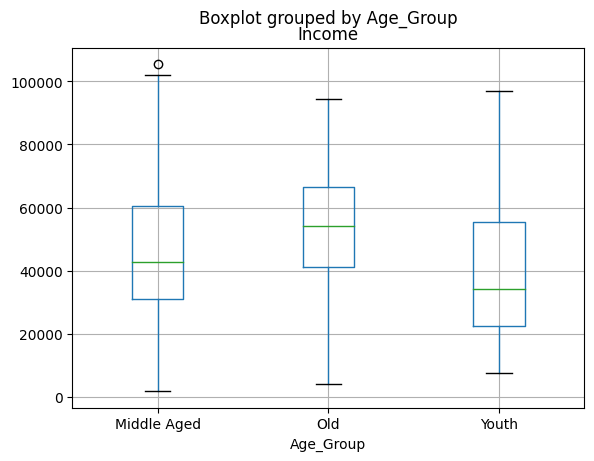

In [687]:
df.boxplot(column="Income", by="Age_Group")

<Axes: title={'center': 'Kidhome'}, xlabel='Age_Group'>

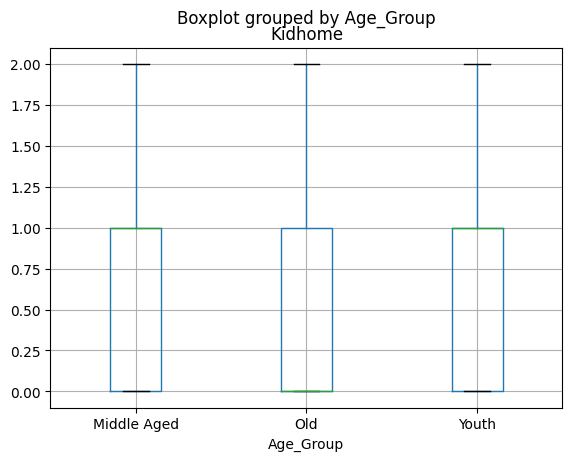

In [688]:
df.boxplot(column="Kidhome", by="Age_Group")

<Axes: title={'center': 'Teenhome'}, xlabel='Age_Group'>

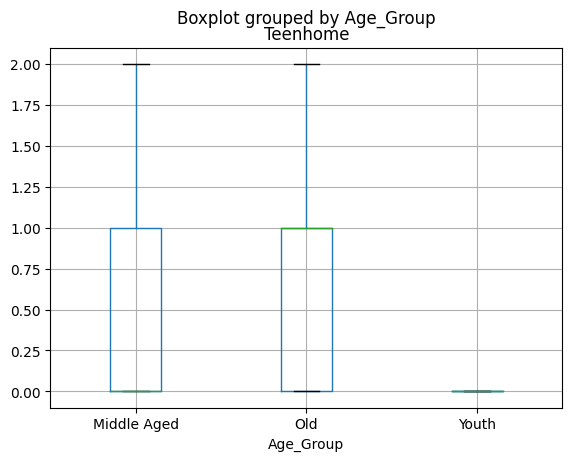

In [689]:
df.boxplot(column="Teenhome", by="Age_Group")

In [690]:
df['Total_Income'] = (df['MntFruits'] + df['MntWines'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])

In [691]:
Total_Compras=df[['Total_Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]


In [692]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1989 entries, 1 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1989 non-null   int64  
 1   Year_Birth           1989 non-null   int64  
 2   Education            1989 non-null   object 
 3   Marital_Status       1989 non-null   object 
 4   Income               1967 non-null   float64
 5   Kidhome              1989 non-null   int64  
 6   Teenhome             1989 non-null   int64  
 7   Dt_Customer          1989 non-null   object 
 8   Recency              1989 non-null   int64  
 9   MntWines             1989 non-null   int64  
 10  MntFruits            1989 non-null   int64  
 11  MntMeatProducts      1989 non-null   int64  
 12  MntFishProducts      1989 non-null   int64  
 13  MntSweetProducts     1989 non-null   int64  
 14  MntGoldProds         1989 non-null   int64  
 15  NumDealsPurchases    1989 non-null   int64 

In [693]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1989 entries, 1 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1989 non-null   int64  
 1   Year_Birth           1989 non-null   int64  
 2   Education            1989 non-null   object 
 3   Marital_Status       1989 non-null   object 
 4   Income               1967 non-null   float64
 5   Kidhome              1989 non-null   int64  
 6   Teenhome             1989 non-null   int64  
 7   Dt_Customer          1989 non-null   object 
 8   Recency              1989 non-null   int64  
 9   MntWines             1989 non-null   int64  
 10  MntFruits            1989 non-null   int64  
 11  MntMeatProducts      1989 non-null   int64  
 12  MntFishProducts      1989 non-null   int64  
 13  MntSweetProducts     1989 non-null   int64  
 14  MntGoldProds         1989 non-null   int64  
 15  NumDealsPurchases    1989 non-null   int64 

In [694]:
df['Total_Income']

,Total_Income
1,27
2,776
3,53
4,422
5,716
...,...
2234,30
2236,444
2237,1241
2238,843


<Axes: title={'center': 'Total_Income'}, xlabel='Age_Group'>

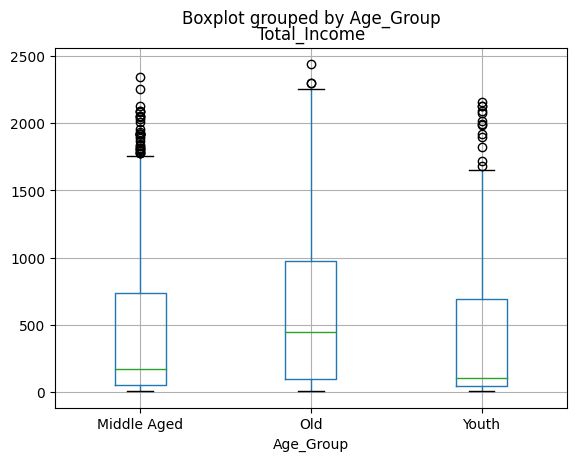

In [695]:
df.boxplot(column="Total_Income", by="Age_Group")

<Axes: title={'center': 'Total_Income'}, xlabel='Education'>

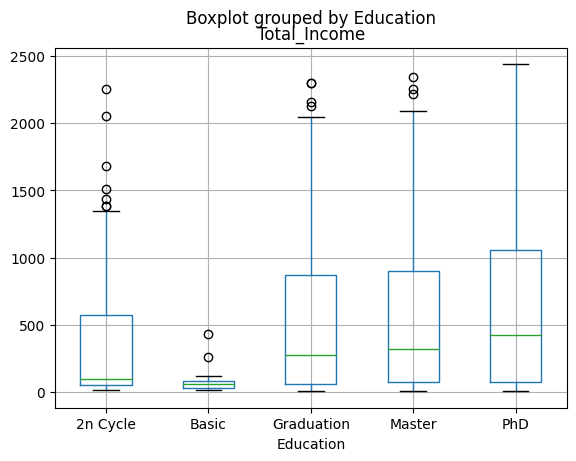

In [696]:
df.boxplot(column="Total_Income", by="Education")

<Axes: title={'center': 'MntSweetProducts'}, xlabel='Education'>

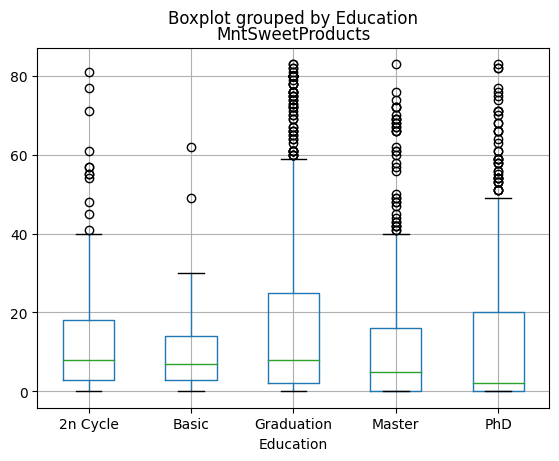

In [697]:
df.boxplot(column="MntSweetProducts", by="Education")

<Axes: title={'center': 'MntSweetProducts'}, xlabel='Age_Group'>

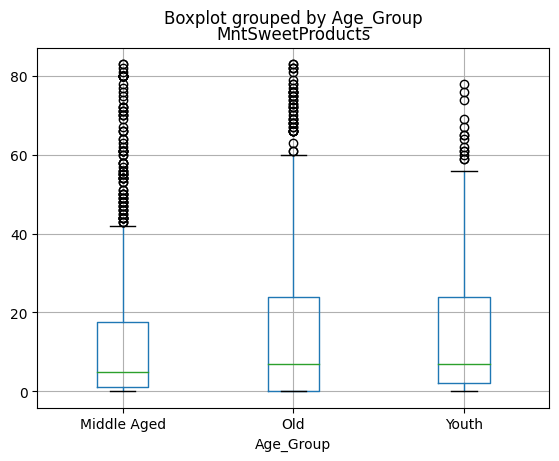

In [698]:
df.boxplot(column="MntSweetProducts", by="Age_Group")

In [699]:
Total_Compras.sum()

,0
Total_Income,1024812
MntWines,548589
MntFruits,40340
MntMeatProducts,270031
MntFishProducts,57901
MntSweetProducts,29635
MntGoldProds,78316


In [700]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
## ~ en la logica booleana represetna negacion
## | representa el OR (Uno o el otro, se tiene que cumplir una unica sentencia)
df = df[~((df['Income'] > (Q1-1.5*IQR))|(df['Income'] < (Q3-1.5*IQR)))]

30752.5
